In [2]:
import numpy as np
import matplotlib.pyplot as plt

from thermohl import solver

In [9]:
def plot_all_params(dic):
    # using 1t heat equation on all power terms model sets, building solvers and 
    # solving steady temperature
    models = ["cigre", 'ieee', "olla", "rte"]
    solvers = [solver._factory(dic, heateq='1t', model=m) for m in models]
    results = [s.steady_temperature(return_power=True) for s in solvers]
    
    # plot all
    fig, ax = plt.subplots(nrows=2, ncols=4,figsize=(20, 10))
    for i, key in enumerate(["I", "Ta", "ws"]):
        ax[0, i].plot(dic["hour"], dic[key])
        ax[0, i].set_title(f"Input {key}")
    
    ax[0, 3].set_title("Conductor temperature")
    for i, r in enumerate(results):
        ci = f"C{1+i}"
        ax[0, 3].plot(t, r['t'], c=ci, label=models[i])
        for j, p in enumerate(['P_joule', 'P_solar', 'P_convection', 'P_radiation']):
            ax[1, j].plot(t, r[p], c=ci, label=models[i])
            ax[1, j].set_title(f"{p} (W/m)")
    
    for i in range(ax.shape[0]):
        for j in range(ax.shape[1]):
            ax[i,j].set_xlabel("Time (hour)")
            ax[i,j].grid(True)
    ax[-1,-1].legend()
    %matplotlib inline

We can modify the values of the dictionnary if we don't want to use the default values.
Missing or None values in the input dictionary are replaced with a default value, available using solver.default_values()

In [10]:
# time array (in hours)
t = np.linspace(0., 24, 241)[:-1]

# input dict, with vrying transit, ambient temperature and wind speed
dic = dict(
    lat=45.2,
    lon=0.0,
    alt=543.,
    azm=21.,
    month=6,
    day=20,
    hour=t,
    I=np.piecewise(t, [t < 12., t >= 12.], [300., 600.]),
    Ta=10. + 7.5*(1+np.sin(np.pi * (t-7.0)/12.0)),
    ws=np.piecewise(t, [t <= 6., t>6., t>12., t >= 18.], [1., 2., 1., 3.]),
    wa=69,
    al=0.21,
    tb=0.5,
    d=0.0,
    D=3.0e-02,
    a=0.0,
    A=5.69e-04,
    R=6.30e-02,
    alpha=0.9,
    epsilon=0.8,
    RDC20=5.84e-05,
    km=1.02,
    ki=0.01,
    kl=4.0e-03,
    kq=8.0e-07,
    RDCHigh=6.7744e-05,
    RDCLow=5.84e-05,
    THigh=60.0,
    TLow=20.0
)


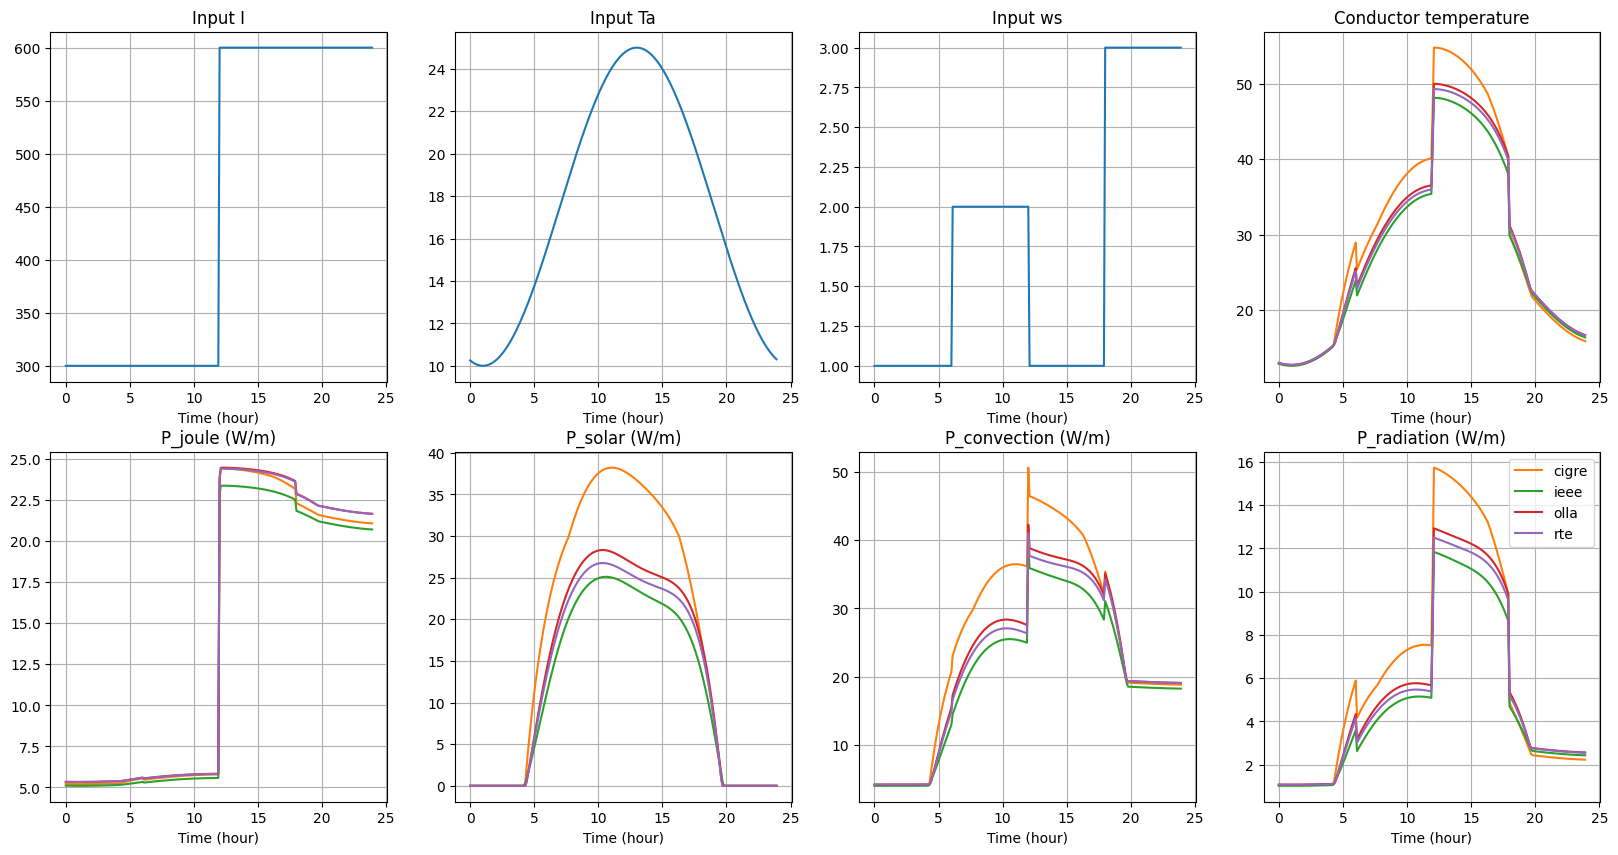

In [11]:
plot_all_params(dic)